<a href="https://colab.research.google.com/github/rahmanziaur/DTClassifierTest/blob/main/TestPreProcess100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df100 = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/DTClassifierTest/main/TestDiabData_100Row.csv')

# Cat-> Num race: Caucasian =1, AfricanAmerican =2, Asian =3, Other =4 
df100['race'] = df100['race'].replace('Caucasian', 1)
df100['race'] = df100['race'].replace('AfricanAmerican', 2)
df100['race'] = df100['race'].replace('Asian', 3)
df100['race'] = df100['race'].replace('Other', 4)

#Cat-> Num gender: Female = 1, male 2
df100['gender'] = df100['gender'].replace('Female', 0)
df100['gender'] = df100['gender'].replace('Male', 1)

# Cat -> Num age [0-10) =1, ... [90-100) = 10
for i in range(0,10):
    df100['age'] = df100['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)

# Cat -> Num 'discharge_disposition_id' replaced with fewer choices, though was numeric
df100['discharge_disposition_id'] = df100['discharge_disposition_id'].replace(1,1)
df100['discharge_disposition_id'] = df100['discharge_disposition_id'].replace(2,1)
df100['discharge_disposition_id'] = df100['discharge_disposition_id'].replace(3,1)
df100['discharge_disposition_id'] = df100['discharge_disposition_id'].replace(5,2)
df100['discharge_disposition_id'] = df100['discharge_disposition_id'].replace(6,2)
df100['discharge_disposition_id'] = df100['discharge_disposition_id'].replace(7,2)
df100['discharge_disposition_id'] = df100['discharge_disposition_id'].replace(11,3)
df100['discharge_disposition_id'] = df100['discharge_disposition_id'].replace(25,3)

# Cat -> Num 'Change'
df100['change'] = df100['change'].replace('Ch', 1)
df100['change'] = df100['change'].replace('No', 0)

# Cat -> Num 'diabetesMed'
df100['diabetesMed'] = df100['diabetesMed'].replace('Yes', 1)
df100['diabetesMed'] = df100['diabetesMed'].replace('No', 0)

# Cat -> Num 'admission_source_id'
df100['admission_source_id'] = df100['admission_source_id'].replace(6,4)

# Cat -> Num 'A1Cresult'

df100['A1Cresult'] = df100['A1Cresult'].replace('>7', 1)
df100['A1Cresult'] = df100['A1Cresult'].replace('>8', 1)
df100['A1Cresult'] = df100['A1Cresult'].replace('None', 0)

#Cat -> Num 'max_glu_serum'

df100['max_glu_serum'] = df100['max_glu_serum'].replace('None', 0)

# dropping columns with missing data or has lesser relation

df100 = df100.drop(['weight','payer_code', 'medical_specialty', 'citoglipton', 'examide'], axis=1)

#added a new column to sum up three related columns

df100['service_utilization'] = df100['number_outpatient'] + df100['number_emergency'] + df100['number_inpatient']

#All similar data columns are shown by a new columns namely 'numchane' then, changed values at once through loop

keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df100[colname] = df100[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df100['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df100['numchange'] = df100['numchange'] + df100[colname]
    del df100[colname]

for col in keys:
    df100[col] = df100[col].replace('No', 0)
    df100[col] = df100[col].replace('Steady', 1)
    df100[col] = df100[col].replace('Up', 1)
    df100[col] = df100[col].replace('Down', 1)

# Cat --> Num 'readmitted' to be target variable (class)

df100['readmitted'] = df100['readmitted'].replace('>30', 0)
df100['readmitted'] = df100['readmitted'].replace('<30', 1)
df100['readmitted'] = df100['readmitted'].replace('NO', 0)

print("Data Types: ")
print(df100.dtypes)

#Checking for missing values in the data

missing = 'NULL'
for col in df100.columns:
    if df100[col].dtype == object:
         print(col,df100[col][df100[col] == '?'].count())
         missing = 'YES'

print("Missing values:", missing)
# Saving the pre-processed data into a new file
df100.to_csv('/content/drive/MyDrive/0_ColabDatasets/P2_TestDiabData_100Row.csv')


In [3]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always') 


dataset=pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/DTClassifierTest/main/tt.csv')
dataset.head()
# print(dataset.shape)
# print(list(dataset.columns))
feature_cols= list(dataset.columns[:-1])

target_cols=list(dataset.columns[-1:])
target_cols

#split dataset in features and target variable
X = dataset.drop('readmitted', axis=1) # Features
y = dataset['readmitted'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Check the shape of all of these
# print("X_train shape is : ", X_train.shape)
# print("X_test shape  is : ", X_test.shape)
# print("y_train shape is : ", y_train.shape)
# print("y_test shape is  : ", y_test.shape)

#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[29  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       0.00      0.00      0.00         1

    accuracy                           0.97        30
   macro avg       0.48      0.50      0.49        30
weighted avg       0.93      0.97      0.95        30



In [20]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
#print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
#print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
#print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
#print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.9666666666666667
Mean Absolute Error: 0.03333333333333333
Cohens kappa: 0.0
Train Time(s):  0.13739049599999476
Test Time(s):  0.012412881999978254


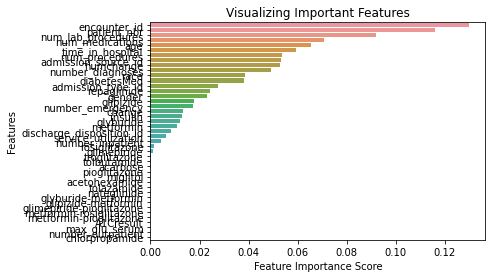

<Figure size 720x1080 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('f8.pdf')
    #plt.show()

plot_roc_curve(fpr, tpr)

report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-RF_Result.csv')

feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)


%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(15)





#plt.tight_layout()
f.savefig('f9.pdf')
f.show()
